# 2.2 Circuit Operations - Duo Qubits

In quantum computing, circuits are composed of quantum gates that operate on qubits, the fundamental units of quantum information. While single-qubit operations are crucial for manipulating individual qubits, duo qubit operations play an equally important role in quantum circuits. These operations involve interactions and transformations between pairs of qubits, enabling the creation of entanglement and facilitating more complex quantum computations.

In this section, we will explore various duo qubit gates commonly used in quantum computing. We will delve into their mathematical representations, actions on quantum states, and their significance in quantum algorithms and error correction.

The gates we will discuss include:

1. Controlled Pauli Gates: The controlled Pauli gates, such as the controlled-X (CNOT), controlled-Y, and controlled-Z gates, are two-qubit gates that apply specific Pauli gate operations on a target qubit conditioned on the state of a control qubit. These gates allow for controlled bit flips, phase flips, and phase shifts based on the control qubit's state.

2. Controlled Hadamard Gate: The controlled Hadamard gate applies a Hadamard gate operation on the target qubit if and only if the control qubit is in the state |1⟩. It enables controlled superposition and entanglement generation between qubits.

3. Controlled Rotation Gates: Controlled rotation gates, such as the controlled Z-rotation gate and controlled U-rotation gate, apply rotation operations on the target qubit based on the state of the control qubit. These gates provide controlled phase shifts and general rotations to manipulate the quantum state of the target qubit.

4. SWAP Gate: The SWAP gate exchanges the states of two qubits, allowing for qubit reordering and rearrangement in quantum circuits. It is a fundamental operation for qubit permutation and enables efficient qubit routing in quantum hardware.

Understanding these duo qubit operations and their properties is essential for constructing quantum circuits, implementing quantum algorithms, and developing quantum error correction techniques. These gates provide the necessary tools for creating entanglement, performing controlled operations, and manipulating the quantum state of multiple qubits, opening up possibilities for more advanced quantum computations.


In [1]:
# Useful additional packages
import matplotlib.pyplot as plt
import numpy as np

from math import pi
from IPython.display import display, Markdown

In [2]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer

from qiskit.quantum_info import Statevector

backend = BasicAer.get_backend('unitary_simulator')

## 2.1. Definitions

In [3]:
def display_circuit(quantum_circuit):
    display(qc.draw('mpl')) 
    job = backend.run(transpile(qc, backend))
    
    print("Complete Matrix: ")
    
    display(job.result().get_unitary(qc, decimals=3))

In [4]:
def simulating_DuoQubit(initial_state, quantum_circuit):
    # Set the initial state of the simulator to the ground state using from_int
    state_initial = Statevector.from_int(initial_state, 2**2)

    # Generate latex_source representation for initial state
    latex_initial = state_initial.draw('latex_source')

    # Evolve the state by the quantum circuit
    state_final = state_initial.evolve(quantum_circuit)

    # Generate latex_source representation for final state
    latex_final = state_final.draw('latex_source')

    # Display the states on a single line with an arrow in between
    display(Markdown(f"**Evolving States:**\n${latex_initial} \\longrightarrow {latex_final}$\n"))

## 2.2 Controlled Pauli Gates
### 2.2.1 Controlled-X or Controlled-NOT (CNOT)
The controlled Pauli gates are important quantum gates that apply a Pauli gate operation on a target qubit, conditioned on the state of a control qubit. In this section, we will discuss the controlled-X gate, also known as the controlled-NOT (CNOT) gate.

The controlled-X gate is a two-qubit gate that performs an X gate operation on the target qubit if and only if the control qubit is in the state $|1\rangle$. It can be represented by the following matrix:

$$
\text{CNOT} = \begin{bmatrix} 
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
\end{bmatrix}
$$

In this matrix representation, the rows and columns correspond to the basis states $|00\rangle$, $|01\rangle$, $|10\rangle$, and $|11\rangle$, respectively.

The action of the controlled-X gate on a two-qubit state is as follows:

$$
\text{CNOT}(|\text{control}\rangle \otimes |\text{target}\rangle) = |\text{control}\rangle \otimes (X^{\text{control}}|\text{target}\rangle)
$$

where $X^{\text{control}}$ represents the application of an X gate on the target qubit if the control qubit is in the state $|1\rangle$, and does nothing otherwise.

The controlled-X gate is widely used in quantum algorithms and quantum error correction codes. It plays a crucial role in entangling qubits and performing computations in quantum circuits.

Other controlled Pauli gates, such as controlled-Y and controlled-Z gates, can be defined in a similar way by applying the respective Pauli gates on the target qubit conditioned on the state of the control qubit.

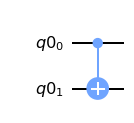

Complete Matrix: 


array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]])

In [5]:
# Circuit Design
qb = QuantumRegister(2)
qc = QuantumCircuit(qb)

# Identity gate
qc.cx(control_qubit = qb[0], target_qubit = qb[1])

display_circuit(qc)

In [6]:
for i in range(2**2):
    simulating_DuoQubit(i, qc) # each posible combination of states

**Evolving States:**
$ |00\rangle \longrightarrow  |00\rangle$


**Evolving States:**
$ |01\rangle \longrightarrow  |11\rangle$


**Evolving States:**
$ |10\rangle \longrightarrow  |10\rangle$


**Evolving States:**
$ |11\rangle \longrightarrow  |01\rangle$


### 2.2.2 Controlled-Y

The controlled-Y gate is another important controlled Pauli gate in quantum computing. It applies a Y gate operation on the target qubit if and only if the control qubit is in the state $|1\rangle$. The controlled-Y gate can be represented by the following matrix:

$$
\text{CY} = \begin{bmatrix} 
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & -i \\
0 & 0 & i & 0 \\
\end{bmatrix}
$$

Similarly to the controlled-X gate, the rows and columns of the matrix correspond to the basis states $|00\rangle$, $|01\rangle$, $|10\rangle$, and $|11\rangle$.

The action of the controlled-Y gate on a two-qubit state is given by:

$$
\text{CY}(|\text{control}\rangle \otimes |\text{target}\rangle) = |\text{control}\rangle \otimes (Y^{\text{control}}|\text{target}\rangle)
$$

Here, $Y^{\text{control}}$ represents the application of a Y gate on the target qubit if the control qubit is in the state $|1\rangle$, and does nothing otherwise.

The controlled-Y gate is particularly useful for creating entangled states and implementing quantum algorithms. It introduces a phase change to the target qubit when the control qubit is in the state $|1\rangle$, making it a valuable tool for quantum information processing.

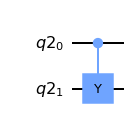

Complete Matrix: 


array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.-1.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j, 0.+0.j, 0.+0.j]])

In [7]:
# Circuit Design
qb = QuantumRegister(2)
qc = QuantumCircuit(qb)

# Identity gate
qc.cy(control_qubit = qb[0], target_qubit = qb[1])

display_circuit(qc)

In [8]:
for i in range(2**2):
    simulating_DuoQubit(i, qc) # each posible combination of states

**Evolving States:**
$ |00\rangle \longrightarrow  |00\rangle$


**Evolving States:**
$ |01\rangle \longrightarrow i |11\rangle$


**Evolving States:**
$ |10\rangle \longrightarrow  |10\rangle$


**Evolving States:**
$ |11\rangle \longrightarrow - i |01\rangle$


### 2.2.3 Controlled-Z or Controlled Phase-Flip Gate

The controlled-Z gate, also known as the controlled phase-flip gate, is a controlled Pauli gate that applies a Z gate operation on the target qubit if and only if the control qubit is in the state $|1\rangle$. The controlled-Z gate can be represented by the following matrix:

$$
\text{CZ} = \begin{bmatrix} 
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & -1 \\
\end{bmatrix}
$$

Similarly to the previous controlled gates, the rows and columns of the matrix correspond to the basis states $|00\rangle$, $|01\rangle$, $|10\rangle$, and $|11\rangle$.

The action of the controlled-Z gate on a two-qubit state is given by:

$$
\text{CZ}(|\text{control}\rangle \otimes |\text{target}\rangle) = |\text{control}\rangle \otimes (Z^{\text{control}}|\text{target}\rangle)
$$

Here, $Z^{\text{control}}$ represents the application of a Z gate on the target qubit if the control qubit is in the state $|1\rangle$, and does nothing otherwise.

The controlled-Z gate is commonly used in various quantum algorithms, including quantum error correction codes and quantum gates construction. It enables the creation of entangled states and facilitates the manipulation of quantum information by introducing phase shifts based on the control qubit state.

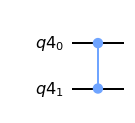

Complete Matrix: 


array([[ 1.-0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  1.-0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.-0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j]])

In [9]:
# Circuit Design
qb = QuantumRegister(2)
qc = QuantumCircuit(qb)

# Identity gate
qc.cz(control_qubit = qb[0], target_qubit = qb[1])

display_circuit(qc)

In [10]:
for i in range(2**2):
    simulating_DuoQubit(i, qc) # each posible combination of states

**Evolving States:**
$ |00\rangle \longrightarrow  |00\rangle$


**Evolving States:**
$ |01\rangle \longrightarrow  |01\rangle$


**Evolving States:**
$ |10\rangle \longrightarrow  |10\rangle$


**Evolving States:**
$ |11\rangle \longrightarrow - |11\rangle$


## 2.3 Controlled Hadamard Gate

The controlled Hadamard gate is a controlled gate that applies a Hadamard gate operation on the target qubit if and only if the control qubit is in the state $|1\rangle$. The controlled Hadamard gate can be represented by the following matrix:

$$
\text{CH} = \frac{1}{\sqrt{2}}\begin{bmatrix} 
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & -1 \\
\end{bmatrix}
$$

Similar to other controlled gates, the rows and columns of the matrix correspond to the basis states $|00\rangle$, $|01\rangle$, $|10\rangle$, and $|11\rangle$.

The action of the controlled Hadamard gate on a two-qubit state is given by:

$$
\text{CH}(|\text{control}\rangle \otimes |\text{target}\rangle) = |\text{control}\rangle \otimes (H^{\text{control}}|\text{target}\rangle)
$$

Here, $H^{\text{control}}$ represents the application of a Hadamard gate on the target qubit if the control qubit is in the state $|1\rangle$, and does nothing otherwise.

The controlled Hadamard gate is useful in various quantum algorithms, including quantum Fourier transform and quantum phase estimation. It allows for controlled superposition and entanglement generation, contributing to the manipulation and processing of quantum information.

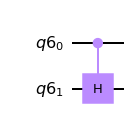

Complete Matrix: 


array([[ 1.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.707+0.j,  0.   +0.j,  0.707-0.j],
       [ 0.   +0.j,  0.   +0.j,  1.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.707+0.j,  0.   +0.j, -0.707-0.j]])

In [11]:
# Circuit Design
qb = QuantumRegister(2)
qc = QuantumCircuit(qb)

# Identity gate
qc.ch(control_qubit = qb[0], target_qubit = qb[1])

display_circuit(qc)

In [12]:
for i in range(2**2):
    simulating_DuoQubit(i, qc) # each posible combination of states

**Evolving States:**
$ |00\rangle \longrightarrow  |00\rangle$


**Evolving States:**
$ |01\rangle \longrightarrow \frac{\sqrt{2}}{2} |01\rangle+\frac{\sqrt{2}}{2} |11\rangle$


**Evolving States:**
$ |10\rangle \longrightarrow  |10\rangle$


**Evolving States:**
$ |11\rangle \longrightarrow \frac{\sqrt{2}}{2} |01\rangle- \frac{\sqrt{2}}{2} |11\rangle$


## 2.4 Controlled Rotation Gates

Controlled rotation gates are a family of gates that apply a rotation operation on the target qubit based on the state of the control qubit. In this section, we will discuss the controlled Z-rotation gate.

### 2.4.1 Controlled Z-Rotation Gate

The controlled Z-rotation gate, denoted as $CRZ(\theta)$, applies a rotation of angle $\theta$ around the Z-axis on the target qubit if and only if the control qubit is in the state $|1\rangle$. The controlled Z-rotation gate can be represented by the following matrix:

$$
CRZ(\theta) = \begin{bmatrix} 
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & e^{-i\theta/2} & 0 \\
0 & 0 & 0 & e^{i\theta/2} \\
\end{bmatrix}
$$

In this matrix representation, the rows and columns correspond to the basis states $|00\rangle$, $|01\rangle$, $|10\rangle$, and $|11\rangle$.

The action of the controlled Z-rotation gate on a two-qubit state is given by:

$$
CRZ(\theta)(|\text{control}\rangle \otimes |\text{target}\rangle) = |\text{control}\rangle \otimes (R_Z^{\text{control}}(\theta)|\text{target}\rangle)
$$

Here, $R_Z^{\text{control}}(\theta)$ represents the rotation of angle $\theta$ around the Z-axis on the target qubit if the control qubit is in the state $|1\rangle$, and does nothing otherwise.

Controlled rotation gates, including the controlled Z-rotation gate, are widely used in quantum algorithms for various purposes such as phase estimation, controlled phase-flips, and creating entanglement. They provide a versatile tool for manipulating quantum states based on the control qubit's state and the desired rotation angle $\theta$.

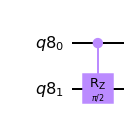

Complete Matrix: 


array([[1.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.707-0.707j, 0.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.   +0.j   , 1.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.707+0.707j]])

In [13]:
# Circuit Design
qb = QuantumRegister(2)
qc = QuantumCircuit(qb)

# Identity gate
qc.crz(theta = pi/2, control_qubit = qb[0], target_qubit = qb[1])

display_circuit(qc)

In [14]:
for i in range(2**2):
    simulating_DuoQubit(i, qc) # each posible combination of states

**Evolving States:**
$ |00\rangle \longrightarrow  |00\rangle$


**Evolving States:**
$ |01\rangle \longrightarrow (\frac{\sqrt{2}}{2} - \frac{\sqrt{2} i}{2}) |01\rangle$


**Evolving States:**
$ |10\rangle \longrightarrow  |10\rangle$


**Evolving States:**
$ |11\rangle \longrightarrow (\frac{\sqrt{2}}{2} + \frac{\sqrt{2} i}{2}) |11\rangle$


### 2.4.2 Controlled Phase-Rotation Gate

The controlled phase-rotation gate, denoted as $CPhase(\theta)$ or $CR(\theta)$, applies a phase rotation of angle $\theta$ on the target qubit if and only if the control qubit is in the state $|1\rangle$. The controlled phase-rotation gate can be represented by the following matrix:

$$
CPhase(\theta) = \begin{bmatrix} 
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & e^{i\theta} \\
\end{bmatrix}
$$

In this matrix representation, the rows and columns correspond to the basis states $|00\rangle$, $|01\rangle$, $|10\rangle$, and $|11\rangle$.

The action of the controlled phase-rotation gate on a two-qubit state is given by:

$$
CPhase(\theta)(|\text{control}\rangle \otimes |\text{target}\rangle) = |\text{control}\rangle \otimes (R_{\text{phase}}^{\text{control}}(\theta)|\text{target}\rangle)
$$

Here, $R_{\text{phase}}^{\text{control}}(\theta)$ represents the phase rotation of angle $\theta$ on the target qubit if the control qubit is in the state $|1\rangle$, and does nothing otherwise.

Controlled phase-rotation gates are commonly used in quantum algorithms for implementing controlled phase shifts and creating entanglement between qubits. They allow for controlled manipulation of the phase of the target qubit based on the control qubit's state and the specified rotation angle $\theta$.

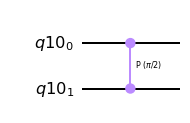

Complete Matrix: 


array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+1.j]])

In [15]:
# Circuit Design
qb = QuantumRegister(2)
qc = QuantumCircuit(qb)

# Identity gate
qc.cp(theta = pi/2, control_qubit = qb[0], target_qubit = qb[1])

display_circuit(qc)

In [16]:
for i in range(2**2):
    simulating_DuoQubit(i, qc) # each posible combination of states

**Evolving States:**
$ |00\rangle \longrightarrow  |00\rangle$


**Evolving States:**
$ |01\rangle \longrightarrow  |01\rangle$


**Evolving States:**
$ |10\rangle \longrightarrow  |10\rangle$


**Evolving States:**
$ |11\rangle \longrightarrow i |11\rangle$


### 2.4.3 Controlled U-Rotation Gate

The controlled U-rotation gate, denoted as $CU(\theta, \phi, \lambda)$, applies a rotation operation specified by the angles $\theta$, $\phi$, and $\lambda$ on the target qubit if and only if the control qubit is in the state $|1\rangle$. The controlled U-rotation gate can be represented by the following matrix:

$$
CU(\theta, \phi, \lambda) = \begin{bmatrix} 
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & e^{-i(\phi+\lambda)/2}\cos(\theta/2) & -e^{-i(\phi-\lambda)/2}\sin(\theta/2) \\
0 & 0 & e^{i(\phi-\lambda)/2}\sin(\theta/2) & e^{i(\phi+\lambda)/2}\cos(\theta/2) \\
\end{bmatrix}
$$

In this matrix representation, the rows and columns correspond to the basis states $|00\rangle$, $|01\rangle$, $|10\rangle$, and $|11\rangle$.

The action of the controlled U-rotation gate on a two-qubit state is given by:

$$
CU(\theta, \phi, \lambda)(|\text{control}\rangle \otimes |\text{target}\rangle) = |\text{control}\rangle \otimes (U^{\text{control}}(\theta, \phi, \lambda)|\text{target}\rangle)
$$

Here, $U^{\text{control}}(\theta, \phi, \lambda)$ represents the rotation operation specified by the angles $\theta$, $\phi$, and $\lambda$ on the target qubit if the control qubit is in the state $|1\rangle$, and does nothing otherwise.

Controlled U-rotation gates allow for more general rotations on the target qubit, providing flexibility in quantum circuit design and computation. They are utilized in various quantum algorithms and protocols to perform controlled operations with specific rotation angles.

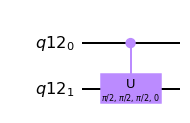

Complete Matrix: 


array([[ 1.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ],
       [ 0.   +0.j   ,  0.707+0.j   ,  0.   +0.j   , -0.   -0.707j],
       [ 0.   +0.j   ,  0.   +0.j   ,  1.   +0.j   ,  0.   +0.j   ],
       [ 0.   +0.j   ,  0.   +0.707j,  0.   +0.j   , -0.707+0.j   ]])

In [17]:
# Circuit Design
qb = QuantumRegister(2)
qc = QuantumCircuit(qb)

# Identity gate
qc.cu(theta = pi/2, phi = pi/2, lam = pi/2, gamma = 0,
      control_qubit = qb[0], target_qubit = qb[1])

display_circuit(qc)

In [18]:
for i in range(2**2):
    simulating_DuoQubit(i, qc) # each posible combination of states

**Evolving States:**
$ |00\rangle \longrightarrow  |00\rangle$


**Evolving States:**
$ |01\rangle \longrightarrow \frac{\sqrt{2}}{2} |01\rangle+\frac{\sqrt{2} i}{2} |11\rangle$


**Evolving States:**
$ |10\rangle \longrightarrow  |10\rangle$


**Evolving States:**
$ |11\rangle \longrightarrow - \frac{\sqrt{2} i}{2} |01\rangle- \frac{\sqrt{2}}{2} |11\rangle$


## 2.5 SWAP Gate

The SWAP gate is a two-qubit gate that exchanges the states of two qubits. It is commonly denoted as SWAP or $S$, and its matrix representation is as follows:

$$
SWAP = \begin{bmatrix} 
1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
\end{bmatrix}
$$

In this matrix, the rows and columns correspond to the basis states $|00\rangle$, $|01\rangle$, $|10\rangle$, and $|11\rangle$. The SWAP gate exchanges the amplitudes between the second and third states.

The action of the SWAP gate on a two-qubit state is given by:

$$
\text{SWAP}(|\text{qubit}_1\rangle \otimes |\text{qubit}_2\rangle) = |\text{qubit}_2\rangle \otimes |\text{qubit}_1\rangle
$$

In other words, the SWAP gate swaps the states of the two qubits. If qubit 1 is in state $|\text{qubit}_1\rangle$ and qubit 2 is in state $|\text{qubit}_2\rangle$, the SWAP gate transforms the state to qubit 1 being in state $|\text{qubit}_2\rangle$ and qubit 2 being in state $|\text{qubit}_1\rangle$.

The SWAP gate is a fundamental gate in quantum computing, enabling the reordering of qubits in quantum circuits. It plays a crucial role in various applications, including quantum algorithms, quantum error correction, and qubit routing in quantum hardware.

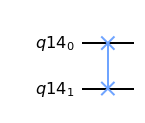

Complete Matrix: 


array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]])

In [19]:
# Circuit Design
qb = QuantumRegister(2)
qc = QuantumCircuit(qb)

# Identity gate
qc.swap(qubit1 = qb[0], qubit2 = qb[1])

display_circuit(qc)

In [20]:
for i in range(2**2):
    simulating_DuoQubit(i, qc) # each posible combination of states

**Evolving States:**
$ |00\rangle \longrightarrow  |00\rangle$


**Evolving States:**
$ |01\rangle \longrightarrow  |10\rangle$


**Evolving States:**
$ |10\rangle \longrightarrow  |01\rangle$


**Evolving States:**
$ |11\rangle \longrightarrow  |11\rangle$
